In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('ice_cream_data.csv')

In [5]:
print(df.head())

      name  ice_cream1  ice_cream2         ice_cream3
0     John     Vanilla   Chocolate         Strawberry
1    Sarah        Mint  Strawberry  Cookies and Cream
2  Michael   Chocolate     Vanilla         Rocky Road
3    Emily  Strawberry        Mint       Butter Pecan
4    David  Rocky Road        Mint            Vanilla


In [6]:
ice_cream_flavors = df[['ice_cream1', 'ice_cream2', 'ice_cream3']].values.flatten()
unique_flavors = set(ice_cream_flavors)
print("Unique Ice Cream Flavors:", unique_flavors)

Unique Ice Cream Flavors: {'Butter Pecan', 'Vanilla', 'Chocolate', 'Rocky Road', 'Strawberry', 'Mint', 'Cookies and Cream'}


In [7]:
#count occurences each one
flavor_counts = pd.Series(ice_cream_flavors).value_counts()
print("Ice Cream Flavor Counts:")
print(flavor_counts)


Ice Cream Flavor Counts:
Vanilla              36
Mint                 33
Chocolate            31
Strawberry           31
Cookies and Cream    26
Rocky Road           17
Butter Pecan         12
dtype: int64


In [8]:
df['ice_cream1'] = df['ice_cream1'].str.lower()
df['ice_cream2'] = df['ice_cream2'].str.lower()
df['ice_cream3'] = df['ice_cream3'].str.lower()


In [9]:
# Filter rows
vanilla_lovers = df[df['ice_cream1'] == 'vanilla']
print("Vanilla Lovers:")
print(vanilla_lovers)

Vanilla Lovers:
         name ice_cream1         ice_cream2  ice_cream3
0        John    vanilla          chocolate  strawberry
7      Olivia    vanilla  cookies and cream   chocolate
10    William    vanilla          chocolate  strawberry
17        Mia    vanilla  cookies and cream   chocolate
20       Liam    vanilla          chocolate        mint
26     Daniel    vanilla          chocolate  strawberry
33   Scarlett    vanilla  cookies and cream   chocolate
36    Jackson    vanilla          chocolate  strawberry
43       Lily    vanilla  cookies and cream   chocolate
46  Alexander    vanilla          chocolate        mint
52     Joseph    vanilla          chocolate  strawberry
59   Scarlett    vanilla  cookies and cream   chocolate


In [10]:
# Added a new column calculating the total number of ice cream flavors for each person
df['total_flavors'] = df[['ice_cream1', 'ice_cream2', 'ice_cream3']].nunique(axis=1)
print("Updated Dataset with Total Flavors:")
print(df)


Updated Dataset with Total Flavors:
        name         ice_cream1         ice_cream2         ice_cream3  \
0       John            vanilla          chocolate         strawberry   
1      Sarah               mint         strawberry  cookies and cream   
2    Michael          chocolate            vanilla         rocky road   
3      Emily         strawberry               mint       butter pecan   
4      David         rocky road               mint            vanilla   
..       ...                ...                ...                ...   
57    Sophia          chocolate         strawberry  cookies and cream   
58     Lucas               mint       butter pecan            vanilla   
59  Scarlett            vanilla  cookies and cream          chocolate   
60     Mason         strawberry            vanilla               mint   
61     Avery  cookies and cream         rocky road          chocolate   

    total_flavors  
0               3  
1               3  
2               3  
3      

In [11]:
# Group the dataset by ice cream flavors and calculate the average number of total flavors for each flavor
flavor_group = df.groupby('ice_cream1')['total_flavors'].mean()
print("Average Total Flavors by Ice Cream Flavor:")
print(flavor_group)

Average Total Flavors by Ice Cream Flavor:
ice_cream1
chocolate            3.0
cookies and cream    3.0
mint                 3.0
rocky road           3.0
strawberry           3.0
vanilla              3.0
Name: total_flavors, dtype: float64


In [12]:
df['class'] = 'Class_A'

In [13]:
unique_flavors = df['ice_cream1'].unique()
num_additional_classes = 2

In [14]:
for i in range(num_additional_classes):
    additional_class = f'Class_{i + 1}'
    df_additional = df.copy()
    np.random.shuffle(unique_flavors)
    df_additional['class'] = additional_class
    df = pd.concat([df, df_additional])


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
print(df)


         name         ice_cream1         ice_cream2         ice_cream3  \
0        John            vanilla          chocolate         strawberry   
1       Sarah               mint         strawberry  cookies and cream   
2     Michael          chocolate            vanilla         rocky road   
3       Emily         strawberry               mint       butter pecan   
4       David         rocky road               mint            vanilla   
..        ...                ...                ...                ...   
243    Sophia          chocolate         strawberry  cookies and cream   
244     Lucas               mint       butter pecan            vanilla   
245  Scarlett            vanilla  cookies and cream          chocolate   
246     Mason         strawberry            vanilla               mint   
247     Avery  cookies and cream         rocky road          chocolate   

     total_flavors    class  
0                3  Class_A  
1                3  Class_A  
2                3  C

Training and Testing the model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
df['likes_vanilla'] = df['ice_cream1'].apply(lambda x: 1 if x == 'vanilla' else 0)#finding the whether the persons like vanilla ice-cream or not

In [19]:
X = df[['likes_vanilla']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.48


Data Analytics

In [23]:
import matplotlib.pyplot as plt

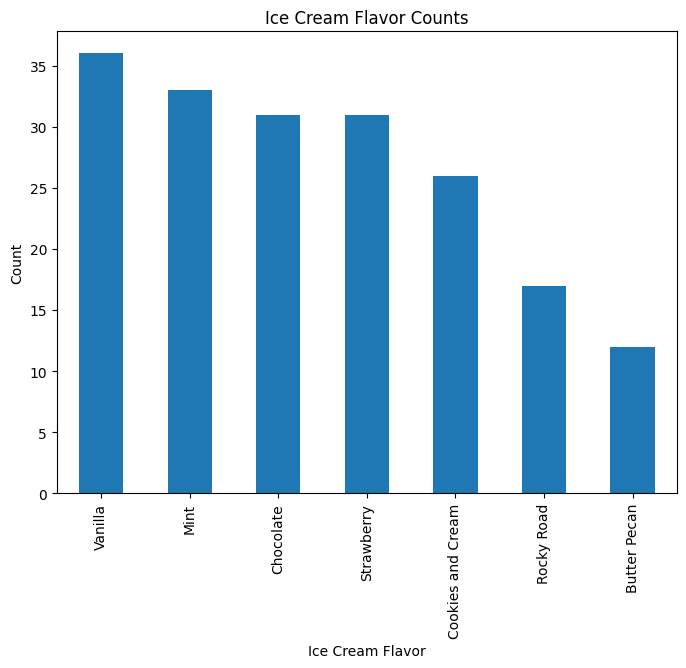

In [24]:
plt.figure(figsize=(8, 6))
flavor_counts.plot(kind='bar')

#labels
plt.title("Ice Cream Flavor Counts")
plt.xlabel("Ice Cream Flavor")
plt.ylabel("Count")

#bar graphs
plt.show()

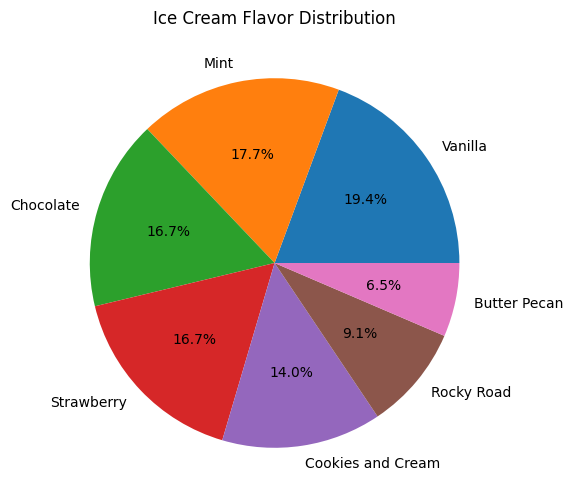

In [25]:
plt.figure(figsize=(8, 6))

#pie chart
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%')
plt.title("Ice Cream Flavor Distribution") # title
plt.show()